<a id="pb"> </a>
## 1.Problem Statement
The project aims at finding the life expectancy of a person residing in a country by taking into account factors like mortality rates,immunization and demographic factors using KNN regression model.The data has been collected between 2000 and 2015 by WHO and United Nation jointly.


<a id="dd"></a>
## 2.Data Definition

#### Label is Life Expectency

**Country :** Country of residence of person (193 unique values)(Categoric)

**Year :** Year in which data is collected(Numeric)

**Status:** Developed, developing or underdeveloped (Categoric)

**Life expectancy:** Average life expectancy in years (Numeric)

**Adult mortality rate:** Probablity of dying between 15 and 60 years per 100( Numeric)

**Infant deaths:** Number of infant deaths per 1000 population (Numeric)

**Alcohol:** Recorder per capita(15+) in litre of pure alcohol (Numeric)

**percentage expenditure:** Expenditure on health as a percentage of Gross Domestic Product (Numeric)

**Hepatitis B:** Immunization coverage among 1- years -olds in percentage (Numeric)

**Measles:** Number of reported cases per 1000 population (Numeric)

**BMI:** Body mass index (Numeric)

**under-five deaths:** Number indicating deaths under the age of 5(Numeric)

**Total expenditure:** Total amount spended (Numeric)

**Diptheria :** Immunization coverage against Diptheria (Numeric)

**HIV/AIDS:** Persons out of 1000 having HIV/AIDS (Numeric)

**GDP:** Gross domestic product of the country (Numeric)

**Population:** Total population of the country (Numeric)

**Thinness 1-19 years:** A BMI measure for 1-19 years age (Numeric)

**Thinness 5-9 years:** A BMI measure for 5-19 years age (Numeric)

**Income composition of resources:** Income composition of resources (Numeric)

**Schooling :**  Total number of people out of 1000 completing schooling (Numeric)

In [1]:
# importing important libraries

# for dataframe manipulations and calculations
import pandas as pd
import numpy as np

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

<a id="ed"></a>
## 3.Exploring the Dataset

In [2]:
# Reading the file
data=pd.read_csv('Life_Expectency.csv')

# data preview
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
# Finding number of rows and columns
data.shape

(2938, 22)

In [4]:
# to get count,null values and data type in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
# to know properties of data 
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
# modifying data columns and removing spaces from them
data.columns=['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five-deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness_1_19_years', 'thinness_5_9_years',
       'Income_composition_of_resources', 'Schooling']

In [7]:
# changing year to object 
data['Year'] = data['Year'].astype('object')

## 4.Univariate Analysis

Text(0.5, 1.0, 'Distribution of Numerical columns')

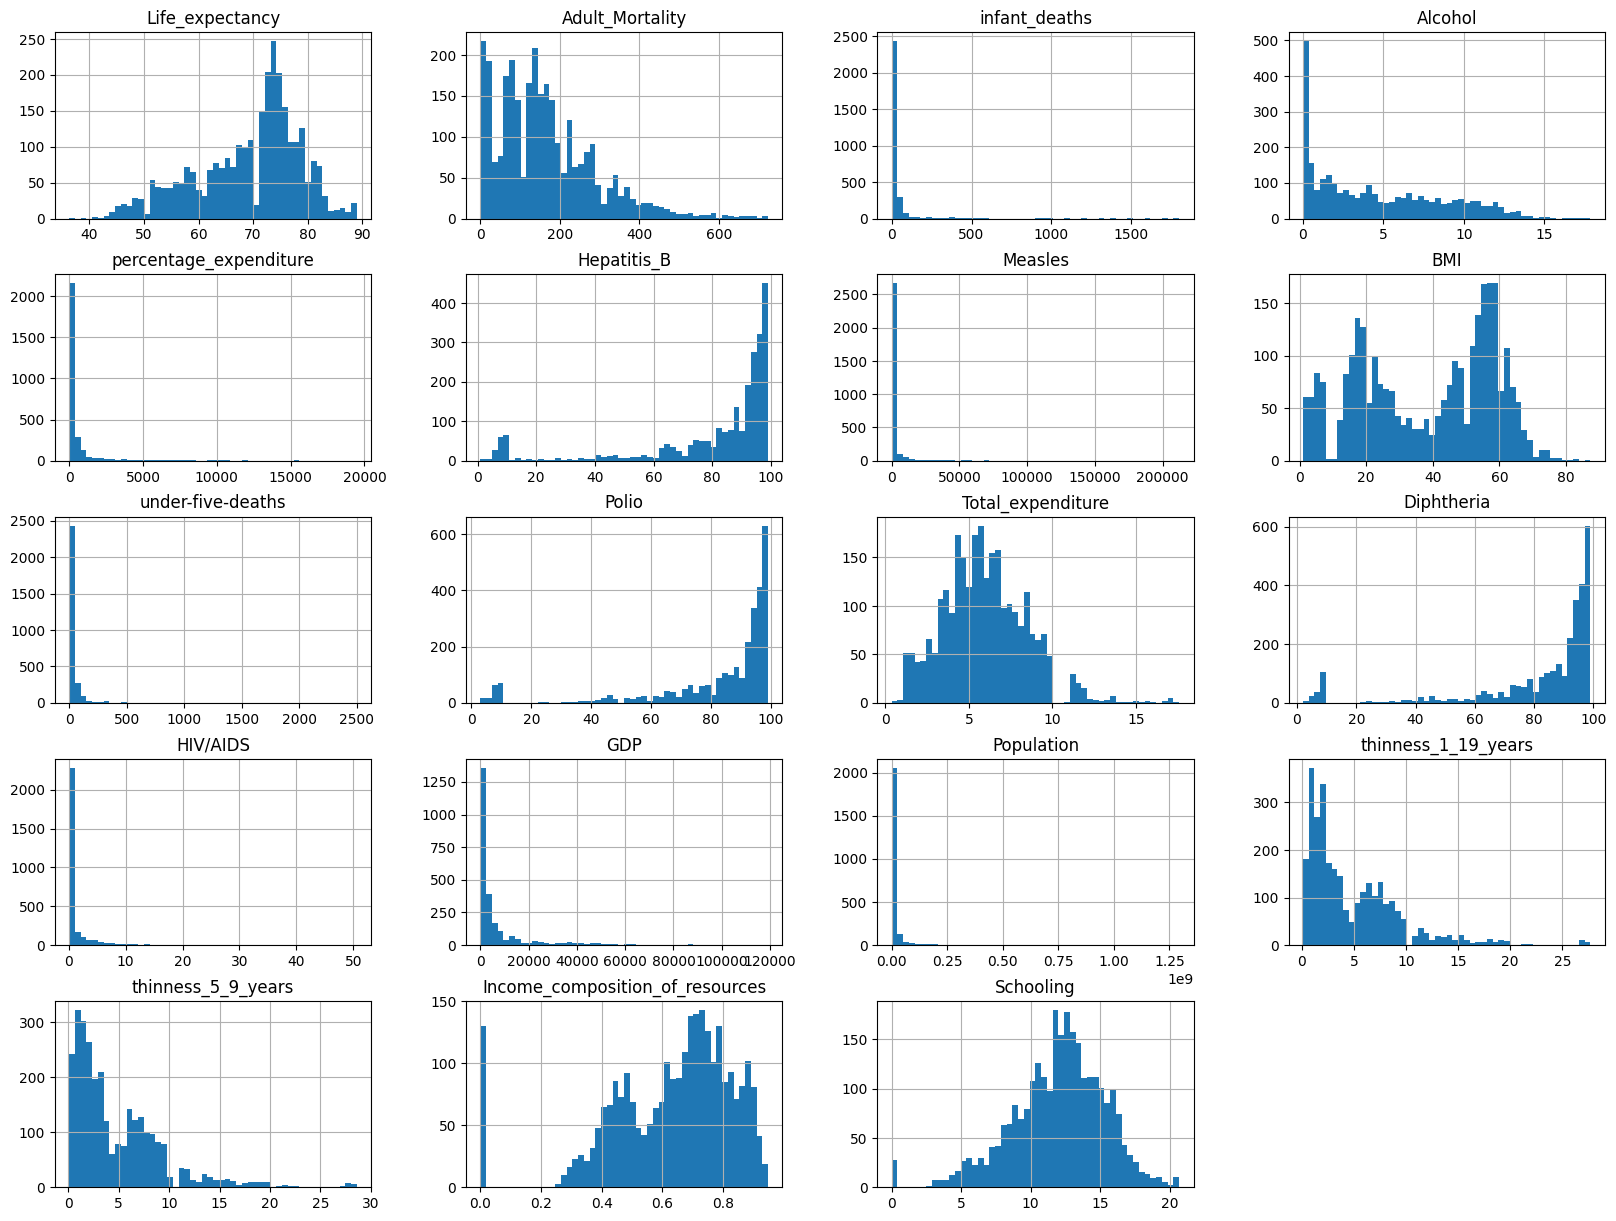

In [8]:
# Q: What is the distribution of the numerical columns?
# histogram is plotted to see distribution of variables
df=data.select_dtypes(include='number')
df.hist(bins=50,figsize=(20,15))
plt.title('Distribution of Numerical columns')

# most of the columns in the data is normally distributed.

Text(0.5, 1.0, 'Country Status')

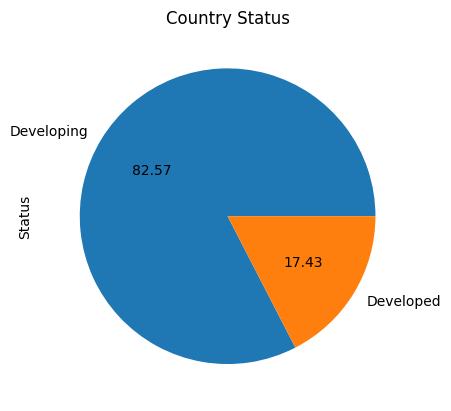

In [9]:
#Q:Are status of the countries evenly divided?
data.Status.value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Country Status')

# count of developing is far more than developed countries.

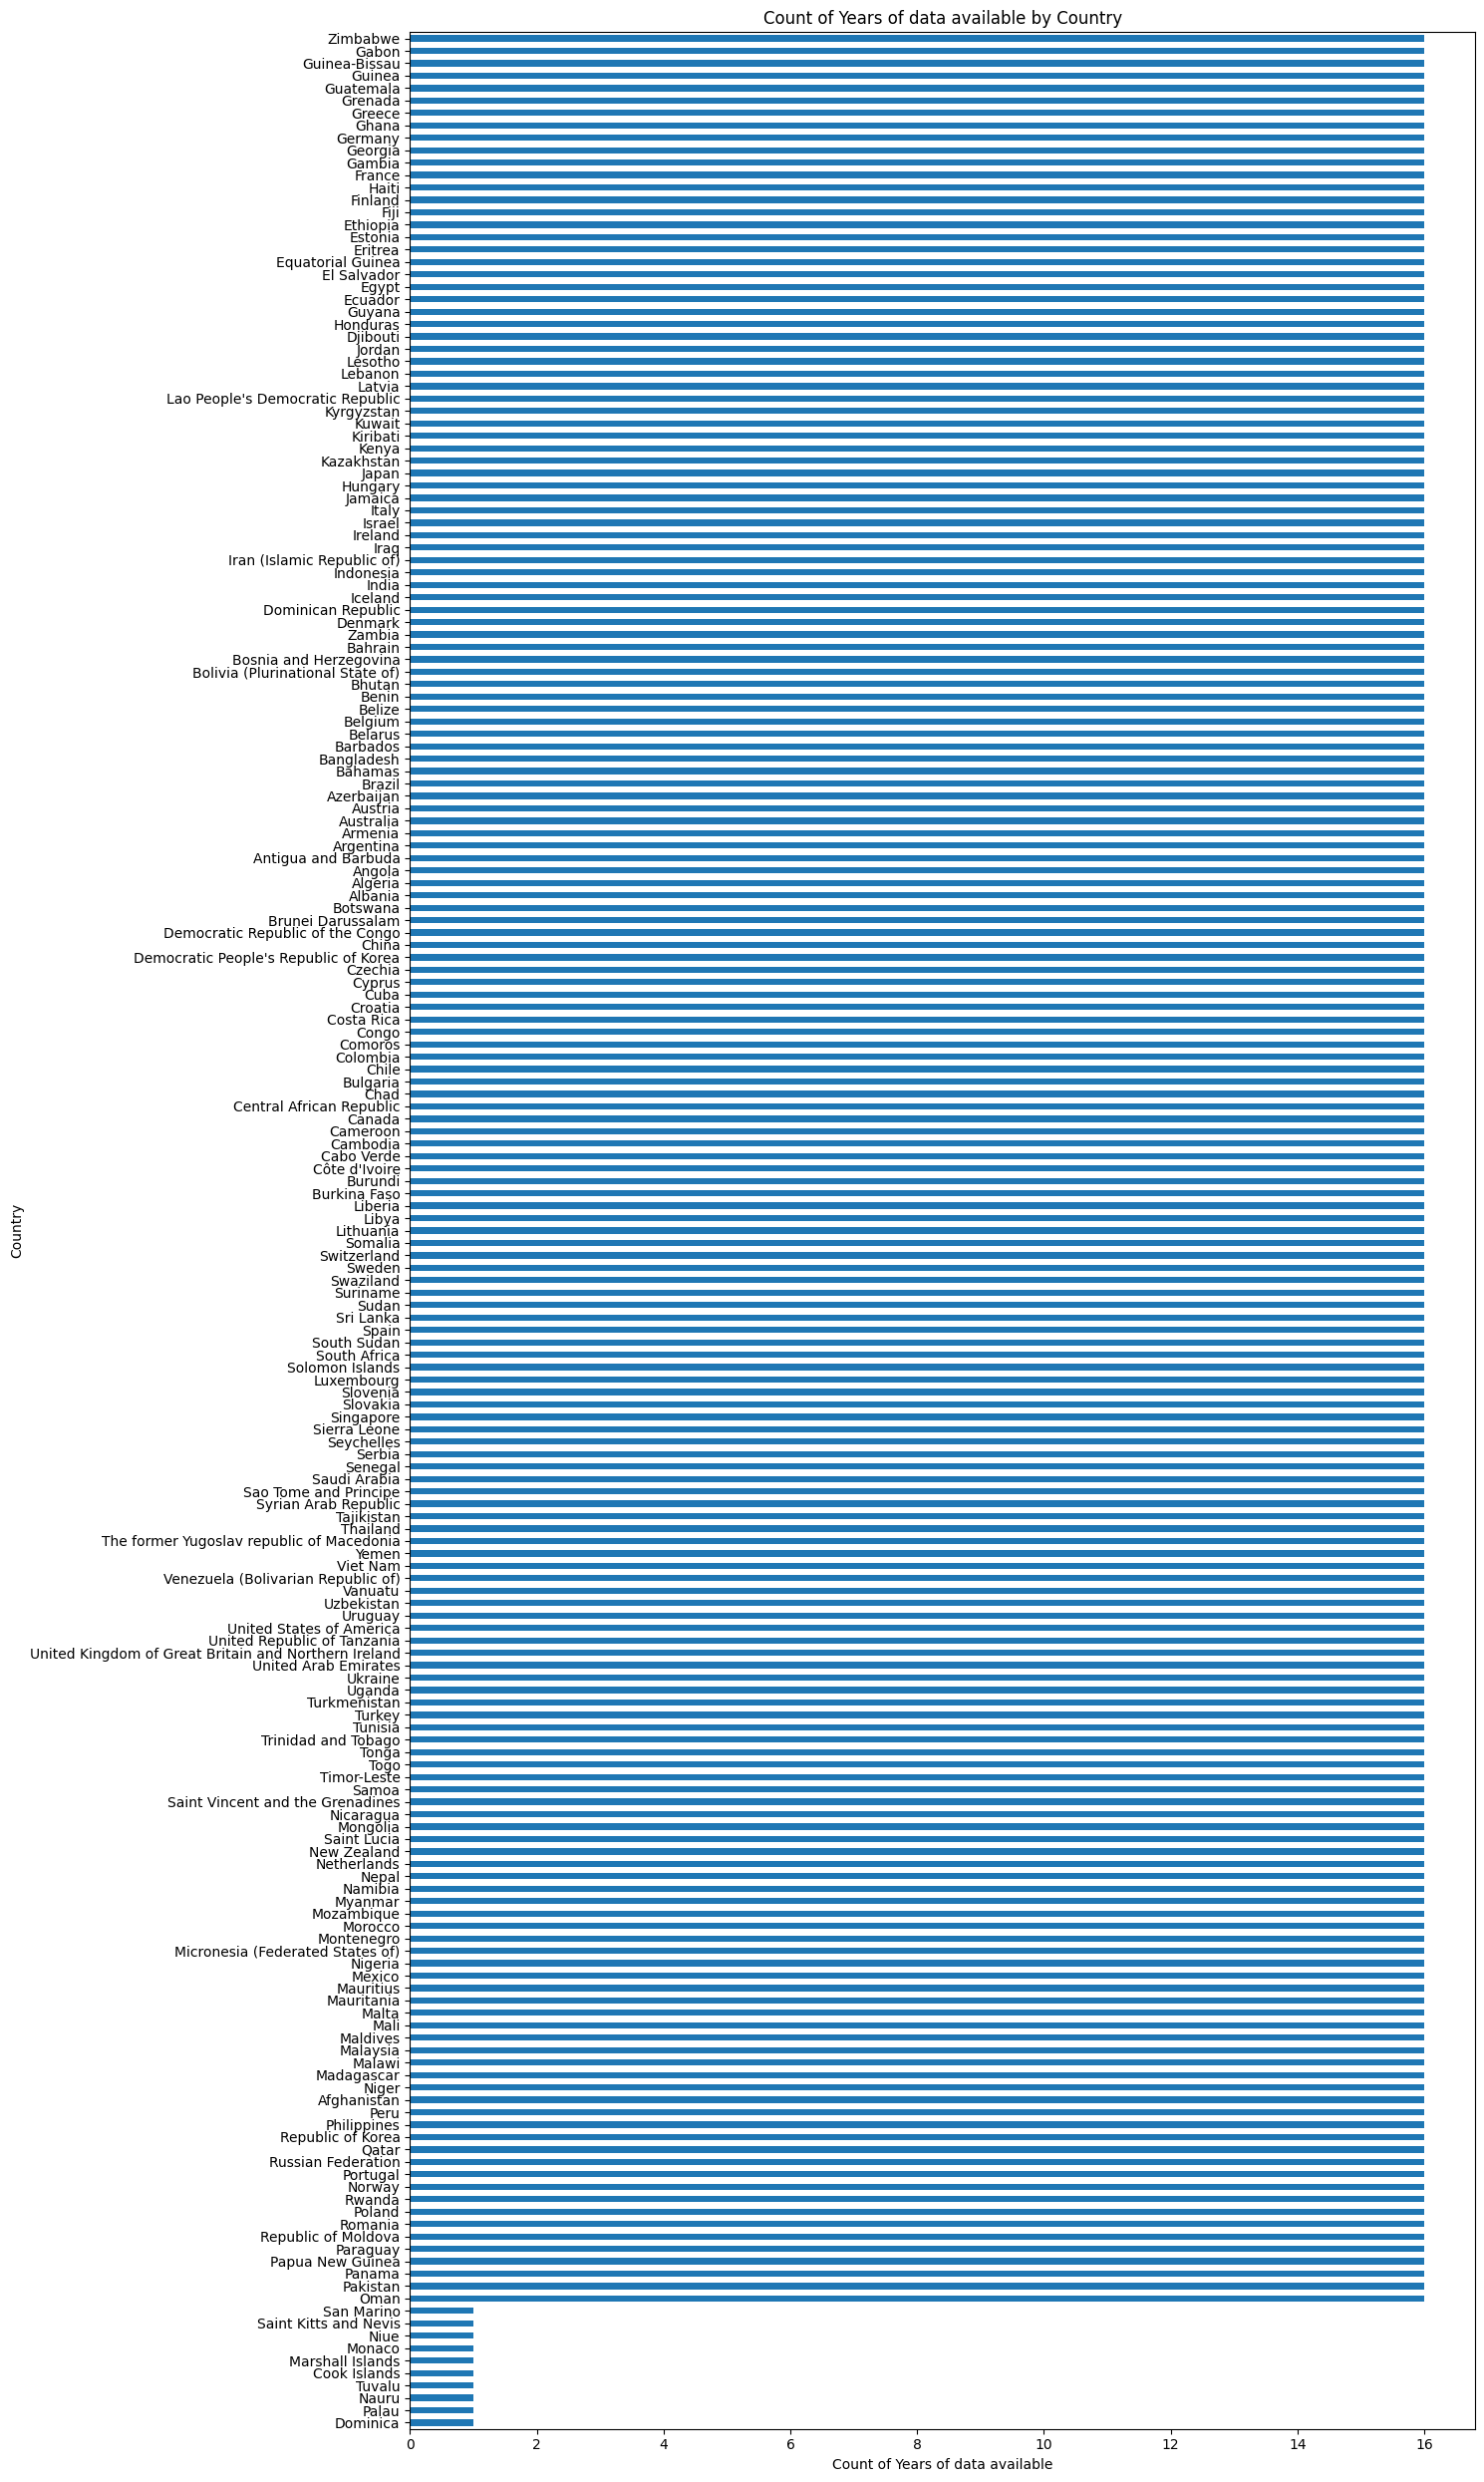

In [10]:
# Q: Are the data for all the countries equally given?
plt.figure(figsize=(15, 25))
data.Country.value_counts(ascending=True).plot(kind='barh')
plt.title('Count of Years of data available by Country')
plt.xlabel('Count of Years of data available')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# For most of the countries, data is there for 16 years of survey
# For few countries like San Marino only one year data is available
# None of the countries are over represented.

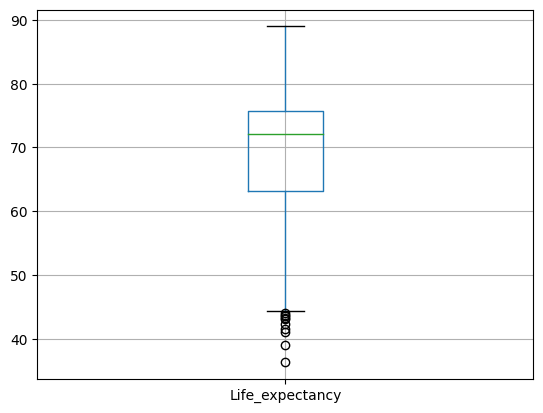

In [11]:
#Q: What is the distribution of label columns?
life=pd.DataFrame(data.iloc[:,3])
life.boxplot();

# outliers are present on lower end.

## 5. Bivariate Analysis

Text(0.5, 1.0, 'CORRELATION IN THE DATA')

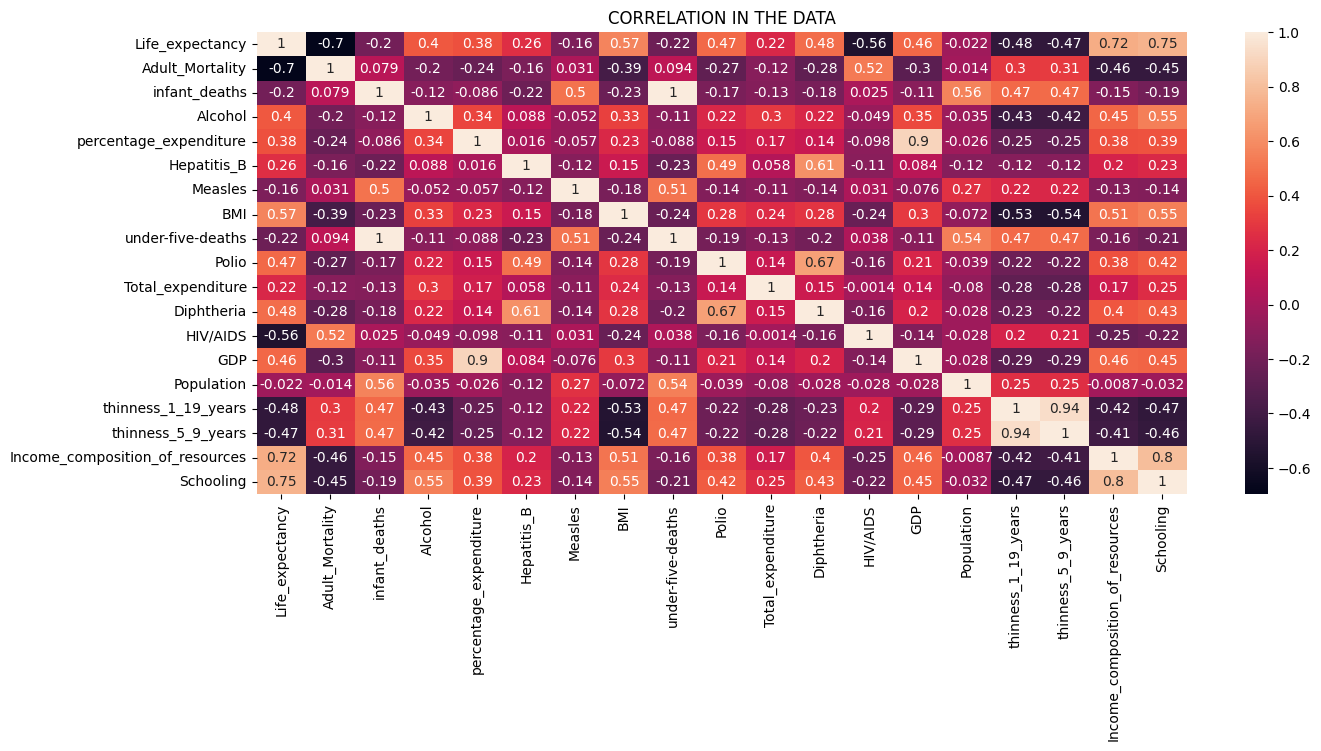

In [12]:
#Q: Are all columns equally important to life expectency?
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(15,6))
sns.heatmap(numeric_data.corr(),annot=True, fmt='.2g')
plt.title('CORRELATION IN THE DATA')
#columns like adult mortality,infant deaths, bmi seems important

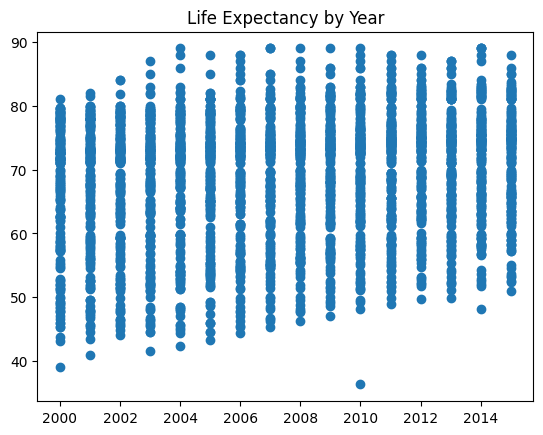

In [13]:
#Q:what is trend between Year and life_expectency?
plt.scatter(x=data['Year'],y=data['Life_expectancy'])
plt.title('Life Expectancy by Year')
plt.show()

Text(0.5, 1.0, 'Trend By Year')

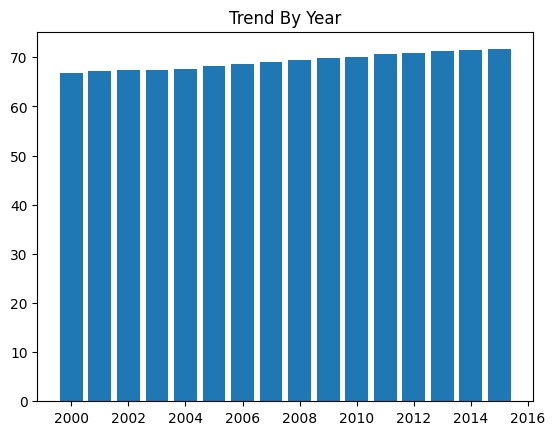

In [14]:
#Q: Is avg life expectency increasing year wise?
ht = data["Life_expectancy"].groupby(data['Year']).mean().values
indx = data["Life_expectancy"].groupby(data['Year']).mean().index
plt.bar(x=indx, height=ht)
plt.title('Trend By Year')

#appears to be positive over time but not increasing significantly

In [15]:
#extracting data about India
india=data.iloc[1187:1202,:]
india.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
1187,India,2014,Developing,68.0,184.0,957,3.07,86.521539,79.0,79563,...,84.0,4.69,85.0,0.2,1573.118890,1.293859e+09,26.8,27.4,0.607,11.6
1188,India,2013,Developing,67.6,187.0,1000,3.11,67.672304,7.0,13822,...,82.0,4.53,83.0,0.2,1452.195373,1.278562e+08,26.8,27.5,0.599,11.5
1189,India,2012,Developing,67.3,19.0,1100,3.10,64.969645,73.0,18668,...,79.0,4.39,82.0,0.2,1446.985410,1.263659e+08,26.9,27.6,0.590,11.3
1190,India,2011,Developing,66.8,193.0,1100,3.00,64.605901,44.0,33634,...,79.0,4.33,82.0,0.2,1461.671957,1.247236e+08,26.9,27.7,0.580,10.8
1191,India,2010,Developing,66.4,196.0,1200,2.77,57.733599,38.0,31458,...,76.0,4.28,79.0,0.2,1345.771530,1.239869e+07,27.0,27.8,0.569,10.4


In [16]:
# logical subsetting is done to extract data for country India
india_df = data[data['Country'] == 'India']

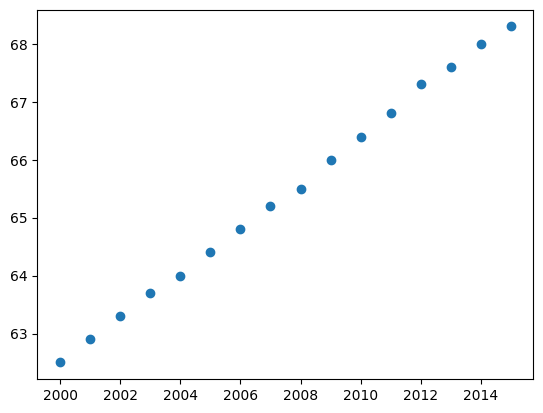

In [17]:
#Q: How average life expectency varies for india? 
plt.scatter(india_df['Year'],india_df['Life_expectancy'])

#increasing constantly.

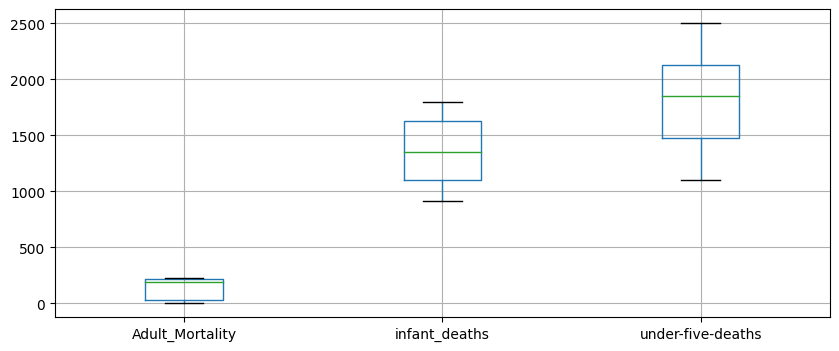

In [18]:
# boxplot of features of high correlation with respect to each other for India
plt.figure(figsize=(10,4))
india_df[['Adult_Mortality','infant_deaths','under-five-deaths']].boxplot();

# it can be seen that 'under five deaths' has most spread  and 'adult mortality' has least spread 

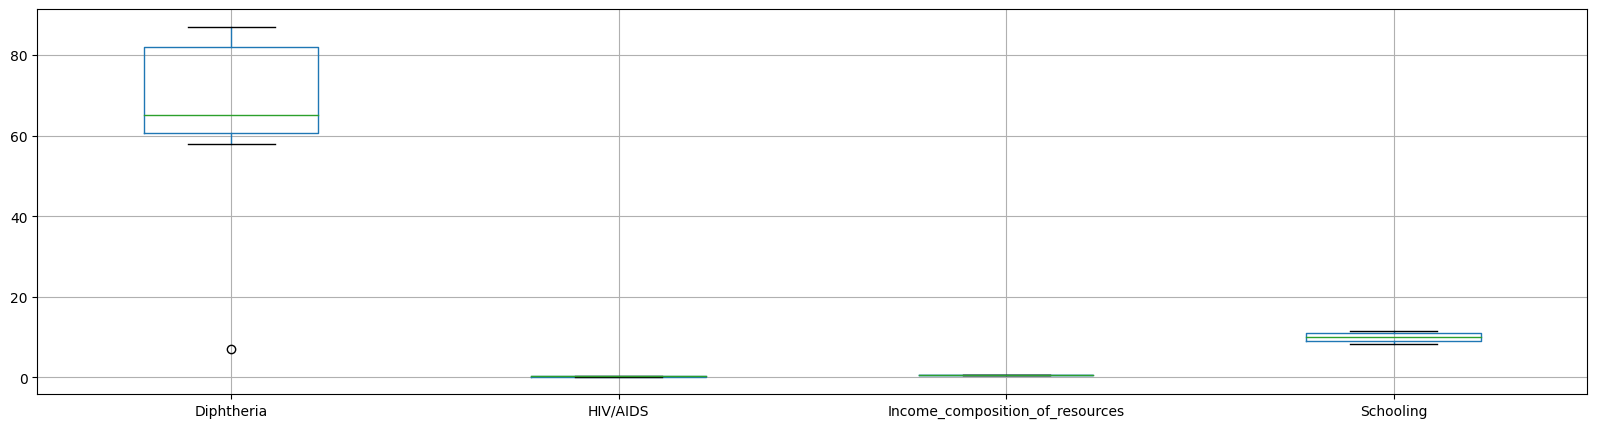

In [19]:
plt.figure(figsize=(20,5))
india_df[['Diphtheria','HIV/AIDS','Income_composition_of_resources','Schooling']].boxplot();

## 6.Comparison of India with Top 5 GDP in the world:

Text(0.5, 1.0, 'Comparison on life expectency')

<Figure size 2500x500 with 0 Axes>

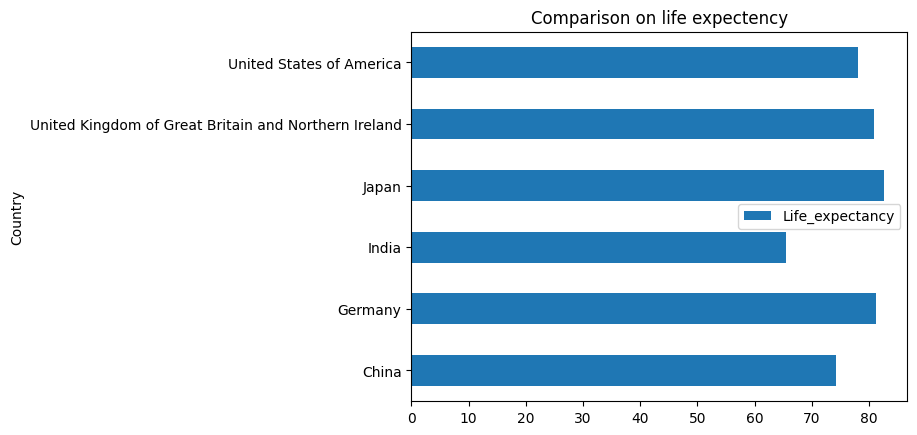

In [20]:
# selecting India, USA , UK, Japan, China and Germany.
# comparison on life expectency.
plt.figure(figsize=(25,5))
country = data[data['Country'].isin(['India', 'United States of America', 'China','Germany','United Kingdom of Great Britain and Northern Ireland','Japan'])]
country.groupby('Country').mean()[['Life_expectancy']].plot.barh(rot=0)
plt.title('Comparison on life expectency')

# India is having least life expectancy and Japan is having highest life expectancy in top 5 GDP countries in the world

Text(0.5, 1.0, 'Comparing different mortality rate')

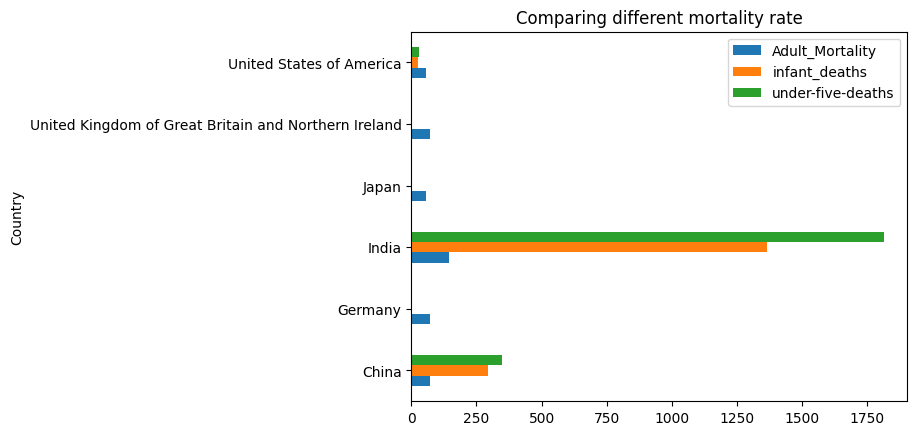

In [21]:
#comparing different mortality rate.
country.groupby('Country').mean()[['Adult_Mortality','infant_deaths','under-five-deaths']].plot.barh(rot=0)
plt.title('Comparing different mortality rate')

# adult mortlity rate,infant death rate and under five deaths are highest in India among the top 5 GDP countries of the world

Text(0.5, 1.0, 'Comparing HIV/AIDS')

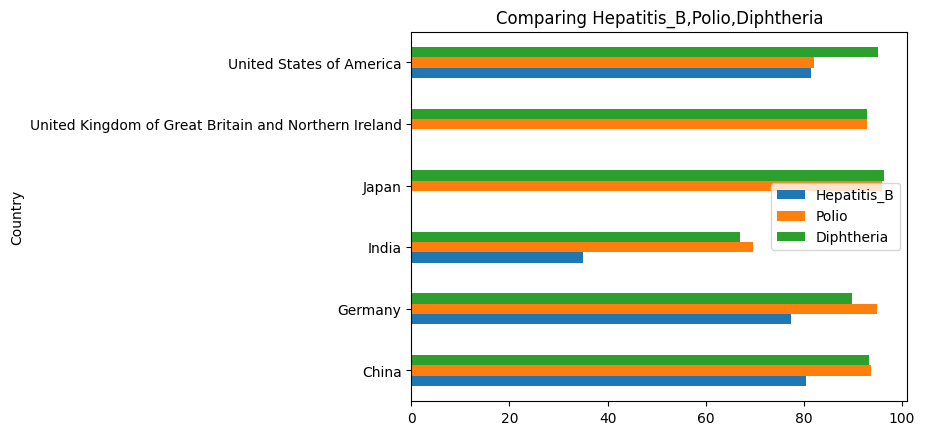

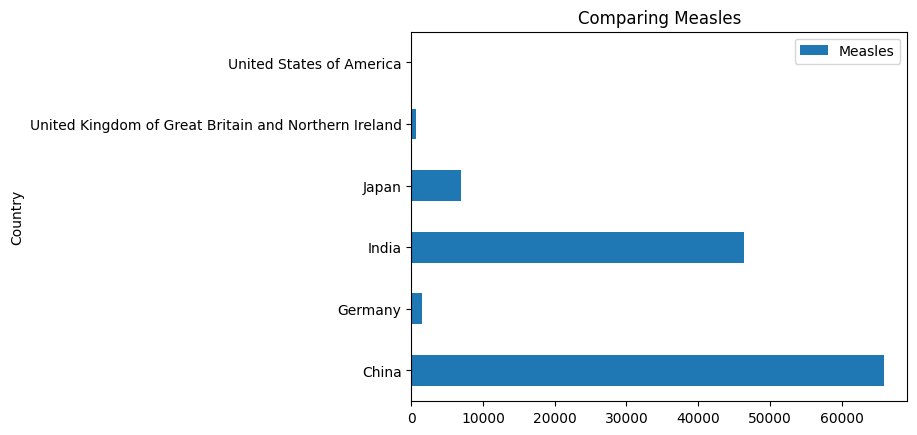

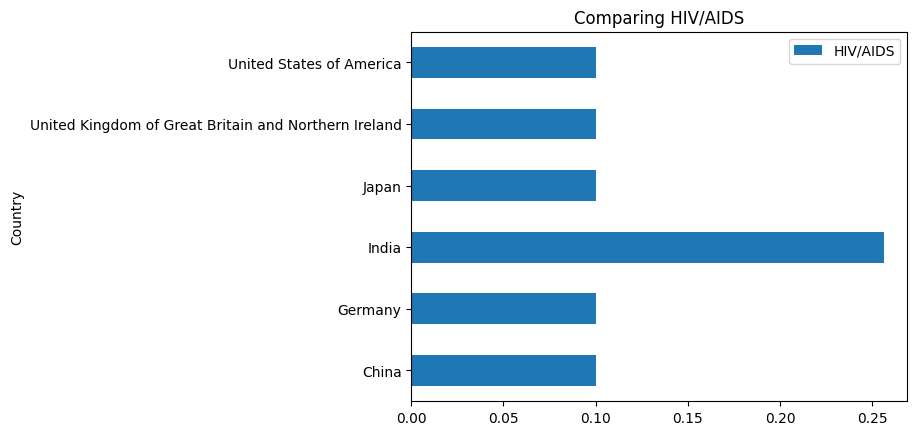

In [22]:
#comparing different Diseases
country.groupby('Country').mean()[['Hepatitis_B','Polio','Diphtheria']].plot.barh(rot=0)
plt.title('Comparing Hepatitis_B,Polio,Diphtheria')
country.groupby('Country').mean()[['Measles']].plot.barh(rot=0)
plt.title('Comparing Measles')
country.groupby('Country').mean()[['HIV/AIDS']].plot.barh(rot=0)
plt.title('Comparing HIV/AIDS')


# India is highest in HIV/AIDS  and second highest in Measles cases among top 5 GDP countries 
# India is lowest in polio, hepatitis B, diphtheria cases among top 5 GDP countries

Text(0.5, 1.0, 'Comparing different Lifestyle Features')

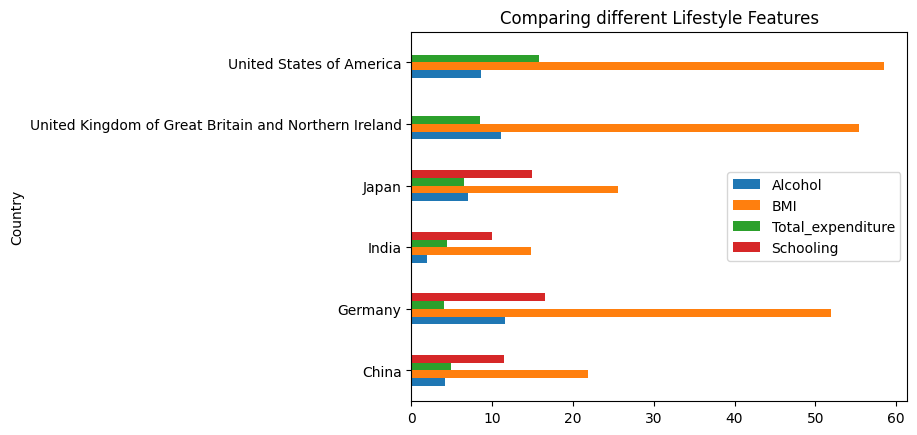

In [23]:
# comparing different lifestyle features.
country.groupby('Country').mean()[['Alcohol','BMI','Total_expenditure','Schooling']].plot.barh(rot=0)
plt.title('Comparing different Lifestyle Features')

#Lifestyle having components of schooling, BMI, total expenditure and alcohol in India is not so good when compared to top 5 GDP countries.

## 7. Hypothesis Testing

In [24]:
from scipy import stats
#step1: stating the hypothesis.
#H0=72.6
#H1<>72.6
print('Hypothesised mean: 72.6')

#step2: collecting required stats
#calculating mean
mu=data['Life_expectancy'].mean()
print('Sample mean: ',round(mu,3))

#calculating standard deviation
std=df['Life_expectancy'].std()
print('Sample standard deviation: ',round(std,3))

#sample size
print('Sample size: ',data.shape[0])

#defining alpha or rejection zone
alpha=0.05

#step3: calculating z_critical.
z_critical_lower=stats.norm.ppf(alpha/2)
z_critical_upper=stats.norm.isf(alpha/2)
print('z_critical_lower',z_critical_lower)
print('z_critical_upper',z_critical_upper)

#step4:calculating sample statistic
n = data.shape[0]
z = (mu - 72.6)/(std/np.sqrt(n))
print('Critical Value: ',z)

#step5: area under the curve i.e p value
#area to the right
area=stats.norm.cdf(z)
print('Area: ',area)

#Step6: declaring the result
if area<z_critical_upper:
    print('Null Hypothesis is Retained')
else: 
    print('Null hypothesis is Rejected')

Hypothesised mean: 72.6
Sample mean:  69.225
Sample standard deviation:  9.524
Sample size:  2938
z_critical_lower -1.9599639845400545
z_critical_upper 1.9599639845400545
Critical Value:  -19.208573700780946
Area:  1.5688430346375428e-82
Null Hypothesis is Retained


#### Data preparation

In [25]:
# to see sum of count of null values
data.isna().sum()

# there are null values in many columns so data for columns with 10,19,34 null values can be removed
# columns with more null values can be imputed

#dropping rows with null values in columns Life expectancy,Adult Mortality,BMI,Polio,Diphtheria,thinness_1_19years,thinness_5_9_years
data.dropna(subset=['Life_expectancy','Adult_Mortality','BMI','Polio','Diphtheria','thinness_1_19_years','thinness_5_9_years'],inplace=True)

#imputing missing values by mean(for normally distributed data e.g. schooling) and median (for skewed data)
data.Schooling = data.Schooling.fillna(data.Schooling.mean())
data.Alcohol = data.Alcohol.fillna(data.Alcohol.median())
data.Hepatitis_B = data.Hepatitis_B.fillna(data.Hepatitis_B.median())
data.Total_expenditure = data.Total_expenditure.fillna(data.Total_expenditure.median())
data.GDP = data.GDP.fillna(data.GDP.median())
data.Population = data.Population.fillna(data.Population.median())
data.Income_composition_of_resources = data.Income_composition_of_resources.fillna(data.Income_composition_of_resources.median())


In [32]:
df_cat=data.select_dtypes(include='object') # dataframe for working on categorical columns
df_num=data.select_dtypes(include='number') # dataframe for working on numerical columns

In [30]:
# Removing outliers from the data 
Q3 = df_num.quantile(0.75)
Q1 = df_num.quantile(0.25)
IQR = Q3 - Q1


# ~ represents NOT or Exclude such rows
data=data[~((df_num < (Q1 - 3 * IQR)) |(df_num > (Q3 + 3 * IQR))).any(axis=1)]
data.shape

# after removal of outliers also row to column ratio is sufficient to work on

(1485, 22)

### Inferences-